# Keras 提供的預訓練模型 VGG16


## 起始準備 （Colab 連接雲端硬碟)

In [1]:
# 連接雲端硬碟，起始準備

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/class_AI/pretrained_by_keras/
!pwd
!ls

Mounted at /content/drive
/content/drive/MyDrive/class_AI/pretrained_by_keras
/content/drive/MyDrive/class_AI/pretrained_by_keras
1_model_VGG16.ipynb  2_four_models.ipynb  koala.png  penguins.png


In [ ]:
# 可依需要上傳檔案
from google.colab import files
uploaded = files.upload()


In [2]:
# 指定要預測的圖檔
filename = 'koala.png'
# filename = 'photo.jpg'

## 1. VGG16 完整預測程序

553467096/553467096 [==============================] - 4s 0us/step
x.shape:  (224, 224, 3)
img.shape:  (1, 224, 224, 3)
35363/35363 [==============================] - 0s 0us/step
預測結果：koala (100.00%)
('n01882714', 'koala', 0.9999949)
('n01883070', 'wombat', 3.547988e-06)
('n01877812', 'wallaby', 1.0040092e-06)
('n02497673', 'Madagascar_cat', 2.6321152e-07)
('n02500267', 'indri', 1.3150758e-07)


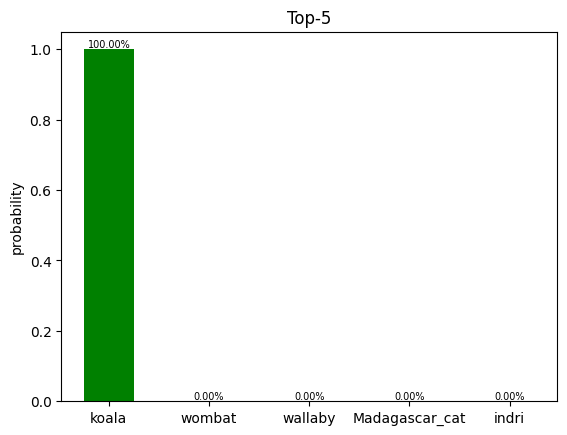

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 建立 VGG16 模型
model = VGG16(weights='imagenet', include_top=True)

# 載入測試圖片
img = image.load_img(filename, target_size=(224, 224))
x = image.img_to_array(img)    # 轉換成 Numpy陣列
print('x.shape: ', x.shape)

# Reshape (1, 224, 224, 3)
img = x.reshape((1, x.shape[0], x.shape[1], x.shape[2]))

# 資料預處理
img = preprocess_input(img)
print('img.shape: ', img.shape)

# 使用模型進行預測
Y_pred = model.predict(img)

# 解碼預測結果
label = decode_predictions(Y_pred, top=5)
result = label[0][0]  # 取得最可能的結果
print('預測結果：%s (%.2f%%)' % (result[1], result[2]*100))

# 逐項列出
for item in label[0]:
  print(item)

# 整理預測結果,value
values = []
bar_label = []
for element in label[0]:
    values.append(element[2])
    bar_label.append(element[1])

def percent(value):
    return '%.2f%%' % (value * 100)

# 繪圖表示
fig = plt.figure(u'Top-5 预测结果')
ax = fig.add_subplot(111)
ax.bar(range(len(values)), values, tick_label=bar_label, width=0.5, fc='g')
ax.set_ylabel(u'probability')
ax.set_title(u'Top-5')
for a,b in zip(range(len(values)), values):
    ax.text(a, b+0.0005, percent(b), ha='center', va = 'bottom', fontsize=7)

fig = plt.gcf()
plt.show()

In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
# 不戴入 top layer
# 表示會載入 VGG16 的模型，但不包括加在最後 3 層的卷積層

model = VGG16(weights='imagenet', include_top=False)
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

## 2. 自建模式

In [ ]:
# 匯入模組
import tensorflow as tf
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

#Conv2D 卷積層, MaxPooling2D 池化層, Flatten 平坦層
from keras.layers import Conv2D, MaxPooling2D, Flatten


In [ ]:
## VGG DIY
input_shape = (224, 224, 3)

model = Sequential([
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1000, activation='softmax')
])
model.summary()
